# Handwriting Recognition Model

## Install & Improt dependencies

In [16]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
import tensorflow as tf
import os

## Remove invalid images

In [ ]:
import cv2
import imghdr

In [7]:
data_dir = "data"

In [8]:
img_extensions = ["jpeg", "jpg", "bmp", "png"]

In [9]:
deleted_imgs = 0
for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, img)
        try:
            # Trying to open an image using cv2
            image = cv2.imread(img_path)
            extension = imghdr.what(img_path)
            if extension not in img_extensions:
                print(f"Image not in extension list {img_path}")
                os.remove(img_path)
                deleted_imgs += 1
        except Exception as e:
            print(f"Issue with image {img_path}")
print(f"Overall deleted images = {deleted_imgs}")

Overall deleted images = 0


## Load data

In [10]:
import numpy
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 245 files belonging to 2 classes.


`data` it's just a generator

`as_numpy_iterator()` is used in order to create data pipeline 

In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [23]:
# images
batch[0].shape

(32, 256, 256, 3)

In [22]:
# labels
batch[1]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

Check which label represent which class of image

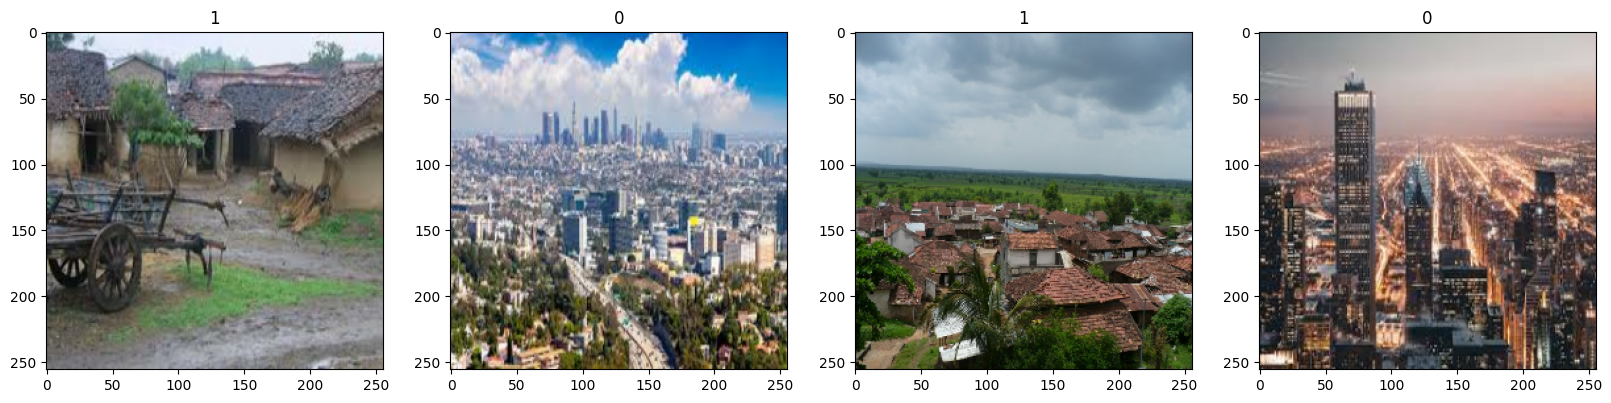

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

- Label 0 - City class
- Label 1 - Village class


## Preprocess data

### Scaling images with [map](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) function

In [32]:
data = data.map(lambda x, y: (x / 255, y))

### Split data to sets

In [38]:
# amount of all batches
len(data)

8

In [43]:
# define amount of batches for each set
train_size = int(len(data) * 0.7)
validation_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1

In [46]:
print(train_size) 
print(validation_size)
print(test_size)

5
2
1


In [47]:
# get particular sets from dataset
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)